<a href="https://colab.research.google.com/github/m3t3orkoga/HomeworkCNN/blob/main/term_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D ,Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dir="/content/drive/MyDrive/image"

img_width, img_height = 128, 128
batch_size=32

train_datagen =ImageDataGenerator(
  rescale=1.0/255,
  rotation_range=30,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode="nearest"
)

In [4]:
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(img_width, img_height),
  batch_size=batch_size,
  class_mode="categorical"
)

model = Sequential([
  Conv2D(32, (3,3), activation="relu", input_shape=(img_width, img_height, 3)),
  MaxPooling2D(2,2),
  Conv2D(64, (3,3), activation="relu"),
  MaxPooling2D(2,2),
  Conv2D(128, (3,3), activation="relu"),
  MaxPooling2D(2,2),
  Flatten(),
  Dense(128, activation="relu"),
  Dropout(0.5),
  Dense(11, activation="softmax")
])

Found 167 images belonging to 11 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer="adam",
            loss="categorical_crossentropy",
            metrics=["accuracy"])
model.summary()

epochs = 40
history =model.fit(train_generator,epochs=epochs)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │           1,419 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,306,059 (12.61 MB)

 Trainable params: 3,306,059 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 53s 7s/step - accuracy: 0.0638 - loss: 2.5536
Epoch 2/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.0994 - loss: 2.3935
Epoch 3/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.1149 - loss: 2.3909
Epoch 4/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.1459 - loss: 2.3885
Epoch 5/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.1306 - loss: 2.3824
Epoch 6/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.0798 - loss: 2.3798
Epoch 7/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.0989 - loss: 2.3857
Epoch 8/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.1708 - loss: 2.3615
Epoch 9/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.0896 - loss: 2.3784
Epoch 10/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.1508 - loss: 2.3696
Epoch 11/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.1531 - loss: 2.3582
Epoch 12/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.1597 - loss: 2.3644
Epoch 13/40
6/6 ━━━━━━━━

In [6]:
from keras.models import load_model
model.save('/content/drive/MyDrive/termproject.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


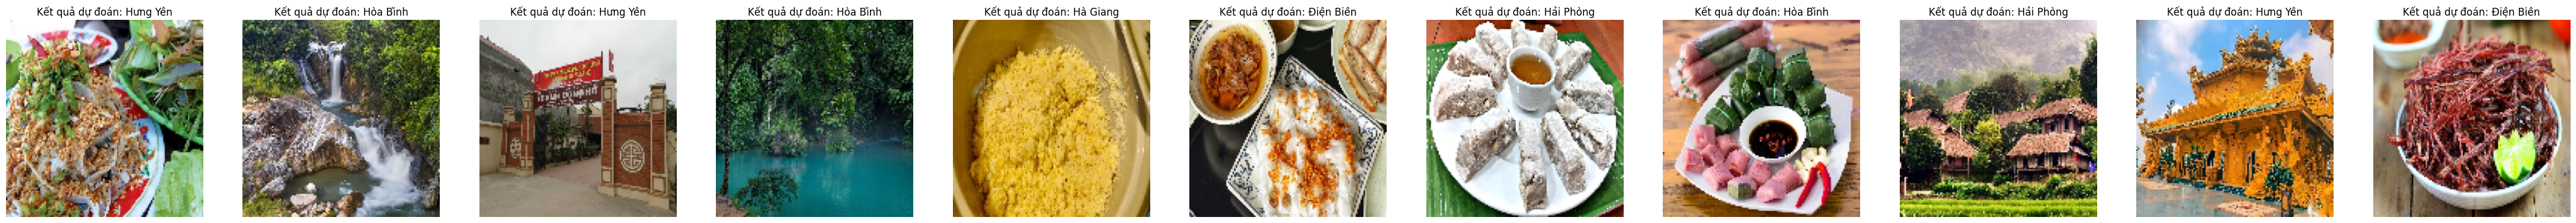

In [9]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

model = load_model('/content/drive/MyDrive/termproject.h5')

image_paths = [
    "/content/drive/MyDrive/image/Bắc Giang/Món ăn/Gỏi cá mè.jpg",
    "/content/drive/MyDrive/image/Bắc Kạn/Địa điểm/Thác Đầu Đẳng.jpg",
    "/content/drive/MyDrive/image/Bắc Ninh/Địa điểm/Làng Tranh Đông Hồ.jpg",
    "/content/drive/MyDrive/image/Cao Bằng/Địa điểm/suối Lê Nin.jpg",
    "/content/drive/MyDrive/image/Hà Giang/Món ăn/Mèn mén.jpg",
    "/content/drive/MyDrive/image/Hà Nam/Món ăn/Bánh cuốn chả Phủ Lý.jpg",
    "/content/drive/MyDrive/image/Hải Dương/Món ăn/Bánh lòng Kinh môn.png",
    "/content/drive/MyDrive/image/Hải Phòng/Món ăn/Nem chua An Thọ.png",
    "/content/drive/MyDrive/image/Hòa Bình/Địa điểm/Khu du lịch Bản Lác.png",
    "/content/drive/MyDrive/image/Hưng Yên/Địa điểm/Chùa Phúc Lâm.png",
    "/content/drive/MyDrive/image/Điện Biên/Món ăn/Thịt trâu gác bếp.jpg"

]

num_images = len(image_paths)

fig, axes = plt.subplots(1, num_images, figsize=(5 * num_images, 5))

for i, path in enumerate(image_paths):
    img = load_img(path, target_size=(128, 128))
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, 128, 128, 3)
    prediction = np.argmax(model.predict(img_array))

    class_labels = {v: k for k, v in train_generator.class_indices.items()}
    name = class_labels[prediction]

    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(f"Kết quả dự đoán: {name}")

plt.show()